# Auditoría del Dataset de Mercado de Jugadores

**Proyecto:** Fantasy Bidding Intelligence  
**Objetivo:** Verificar la calidad, consistencia y validez del dataset antes del modelado  
**Fuente de datos:** Scraping diario del mercado del juego  
**Unidad de análisis:** Jugador en mercado por día  


## Contexto del Dataset

La tabla recoge todos los jugadores que aparecen diariamente en el mercado del juego.

Cada fila representa:
> Un jugador concreto en una fecha determinada mientras está disponible en el mercado.

Variables principales:
- Información deportiva (posición, puntos, equipo)
- Información de mercado (precio, variación)
- Información de subasta (equipo comprador, ganancias, número de pujas)

Este notebook valida que el dataset sea consistente y fiable antes de aplicar EDA avanzada y modelos de ML.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/processed/data_model.csv")


## 1. Vista General del Dataset

Revisión inicial de:
- Dimensiones
- Tipos de datos
- Primeras filas


In [10]:
print("Dimensiones del dataset:", df.shape)
df.dtypes

Dimensiones del dataset: (304, 14)


date                object
jugador             object
precio             float64
posicionJugador    float64
puntosJugador      float64
equipoLiga         float64
avgPoints          float64
estado               int64
variacion          float64
jornada              int64
detalles           float64
equipo              object
ganancias          float64
num_pujas            int64
dtype: object

In [11]:
df.head()

,date,jugador,precio,posicionJugador,puntosJugador,equipoLiga,avgPoints,estado,variacion,jornada,detalles,equipo,ganancias,num_pujas
0,2025-10-29,A. ZAKHARYAN,0.205,3.0,7.0,16.0,1.8,0,NaN,11,2.0,NaN,NaN,0
1,2025-10-29,F. UGRINIC,0.170,3.0,8.0,19.0,2.0,0,NaN,11,2.0,NaN,NaN,0
2,2025-10-29,A. OSAMBELA,0.162,3.0,10.0,50.0,2.5,0,NaN,11,2.0,NaN,NaN,0
3,2025-10-29,A. SAN MIGUEL,0.198,1.0,0.0,4.0,0.0,0,NaN,11,2.0,NaN,NaN,0
4,2025-10-29,A. ITURBE,0.196,1.0,0.0,23.0,0.0,0,NaN,11,2.0,NaN,NaN,0


## 2. Auditoría de Valores Nulos

Se analizan valores faltantes para identificar:
- Nulos esperados (jugadores no comprados)
- Nulos problemáticos


In [12]:
nulos = df.isnull().sum()
pct_nulos = (nulos / len(df)) * 100

nulos_df = pd.DataFrame({
    "nulos": nulos,
    "pct_nulos": pct_nulos
}).sort_values("pct_nulos", ascending=False)

nulos_df


,nulos,pct_nulos
equipo,236,77.631579
ganancias,236,77.631579
variacion,35,11.513158
precio,0,0.000000
date,0,0.000000
jugador,0,0.000000
equipoLiga,0,0.000000
puntosJugador,0,0.000000
posicionJugador,0,0.000000
avgPoints,0,0.000000


### Observaciones
- `equipo`, `ganancias` y `num_pujas` presentan nulos esperados cuando el jugador no ha sido comprado.
- No se detectan nulos inesperados en variables clave deportivas.


## 3. Duplicados

Se revisan:
- Duplicados exactos
- Duplicados lógicos (mismo jugador en la misma fecha)


In [22]:
duplicados_exactos = df.duplicated().sum()
duplicados_logicos = df.duplicated(subset=["date", "jugador"]).sum()

duplicados_exactos, duplicados_logicos


(np.int64(0), np.int64(3))

## 4. Estadística Descriptiva

Revisión de rangos, valores extremos y escalas:
- Variables numéricas
- Variables categóricas


In [14]:
df.describe()


,precio,posicionJugador,puntosJugador,equipoLiga,avgPoints,estado,variacion,jornada,detalles,ganancias,num_pujas
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,269.000000,304.000000,304.000000,68.000000,304.000000
mean,2.980204,2.582237,26.141447,103.687500,3.042763,0.279605,-0.008758,13.230263,5.776316,-5.417371,0.256579
std,3.661019,0.893586,18.977224,283.637449,1.598188,0.818986,0.064914,2.152504,3.709007,4.653898,0.708242
min,0.160000,1.000000,-6.000000,1.000000,-2.000000,0.000000,-0.211000,11.000000,0.500000,-17.649800,0.000000
25%,0.183000,2.000000,10.750000,9.000000,2.200000,0.000000,-0.048000,12.000000,2.000000,-7.664120,0.000000
50%,1.051500,3.000000,23.000000,17.000000,3.100000,0.000000,-0.010000,13.000000,6.000000,-5.297410,0.000000
75%,5.655750,3.000000,37.000000,48.000000,4.000000,0.000000,0.030000,13.000000,9.000000,-1.112419,0.000000
max,15.391000,4.000000,77.000000,1370.000000,14.000000,5.000000,0.171000,18.000000,13.000000,-0.160000,4.000000


In [15]:
categoricas = ["posicionJugador", "equipoLiga", "estado", "equipo"]

for col in categoricas:
    print(f"\n{col}")
    print(df[col].value_counts())



posicionJugador
posicionJugador
3.0    111
2.0    109
4.0     50
1.0     34
Name: count, dtype: int64

equipoLiga
equipoLiga
19.0      29
50.0      27
9.0       22
48.0      21
408.0     15
12.0      15
23.0      15
15.0      15
1.0       14
2.0       14
4.0       13
16.0      13
1370.0    13
17.0      13
14.0      12
222.0     12
5.0       12
20.0      11
8.0        9
3.0        9
Name: count, dtype: int64

estado
estado
0    262
1     22
3     16
4      2
2      1
5      1
Name: count, dtype: int64

equipo
equipo
Maldinillo 💥        14
Libre               13
Dani                11
Chamacónicos        10
De la Guettir FC     9
Los marinero         6
Jotabetrbb           3
MuchaSalsa           2
Name: count, dtype: int64


## 5. Outliers y Sanity Checks

Se validan reglas de negocio:
- Precios negativos
- Puntos negativos
- Puja mayor que precio


In [16]:
checks = {
    "precio_negativo": (df["precio"] < 0).sum(),
    "puntos_negativos": (df["puntosJugador"] < 0).sum(),
    "pujas_negativas": (df["num_pujas"] < 0).sum(),
    "ganancias_mayor_precio": (df["ganancias"] > df["precio"]).sum()
}

checks


{'precio_negativo': np.int64(0),
 'puntos_negativos': np.int64(1),
 'pujas_negativas': np.int64(0),
 'ganancias_mayor_precio': np.int64(0)}

## 6. Visualización Rápida de Coherencia

Gráficos simples para detectar incoherencias evidentes.


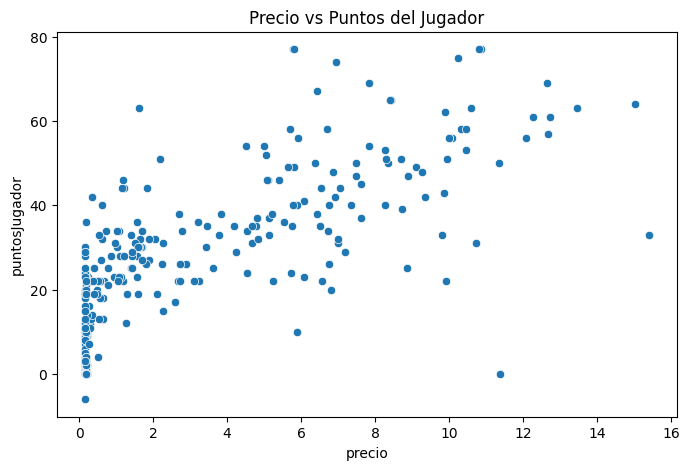

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="precio", y="puntosJugador", data=df)
plt.title("Precio vs Puntos del Jugador")
plt.show()


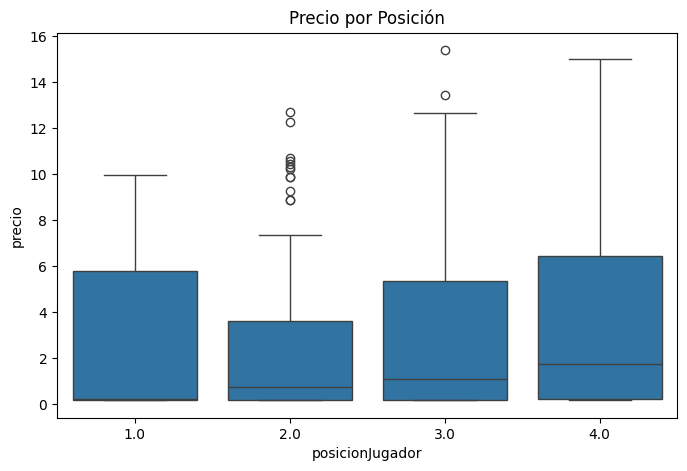

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="posicionJugador", y="precio", data=df)
plt.title("Precio por Posición")
plt.show()


## 7. Revisión Temporal


In [19]:
df["date"] = pd.to_datetime(df["date"])
df["date"].min(), df["date"].max()


(Timestamp('2025-10-29 00:00:00'), Timestamp('2025-12-26 00:00:00'))

## 8. Resumen Final de Auditoría

Se genera una tabla resumen exportable con:
- Tipo de dato
- Nulos
- Cardinalidad


In [ ]:
audit_df = pd.DataFrame({
    "columna": df.columns,
    "tipo": df.dtypes,
    "nulos": df.isnull().sum(),
    "pct_nulos": (df.isnull().sum()/len(df))*100,
    "valores_unicos": df.nunique()
})

os.makedirs("../results", exist_ok=True)
audit_df.to_csv("../results/01_auditoria_dataset.csv", index=False)

audit_df


,columna,tipo,nulos,pct_nulos,valores_unicos
date,date,datetime64[ns],0,0.000000,25
jugador,jugador,object,0,0.000000,209
precio,precio,float64,0,0.000000,224
posicionJugador,posicionJugador,float64,0,0.000000,4
puntosJugador,puntosJugador,float64,0,0.000000,69
equipoLiga,equipoLiga,float64,0,0.000000,20
avgPoints,avgPoints,float64,0,0.000000,54
estado,estado,int64,0,0.000000,6
variacion,variacion,float64,35,11.513158,160
jornada,jornada,int64,0,0.000000,4


## Conclusiones

- El dataset presenta una estructura consistente y coherente.
- Los valores nulos detectados son esperados y corresponden a jugadores no comprados.
- No se detectan incoherencias críticas que impidan el modelado.
- El dataset se considera **apto para EDA avanzada y Feature Engineering**.
